In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
import subprocess
from nomap.image_io import load_tiff_sequence, save_nifti

In [2]:
rootdir = "/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/"
resultdir = os.path.join(rootdir, "analysis")
if not os.path.exists(resultdir):
    subprocess.run(["ssh", "deigo", "mkdir", resultdir])

In [3]:
cwd = os.path.basename(os.getcwd())
tmpdir = os.path.join("/flash/ReiterU/tmp/", cwd)
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)

In [4]:
def main(imgpath, outpath, resize_factor, voxel_size):
    v = load_tiff_sequence(imgpath)
    v = v[0:1800, 80:2500, 580:2080] # Crop
    #v = np.swapaxes(v, 0, 1) # change XYZ order
    #v = v[::-1,::-1,:] # Flip
    
    # Show images
    for i in range(0, v.shape[0], 200):
        plt.imshow(v[i,:,:], cmap="gray")
        plt.show()
    
    v = ndi.zoom(v, zoom=resize_factor, order=2) # resize
    
    save_nifti(v, outpath, voxel_size, voxel_size, voxel_size)

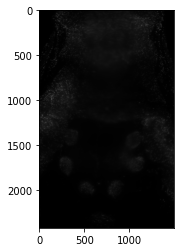

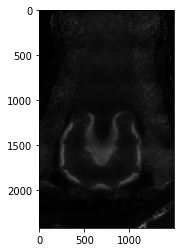

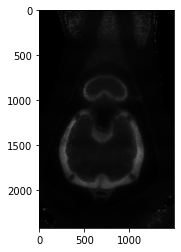

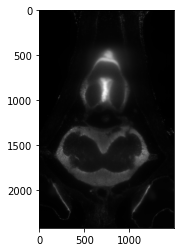

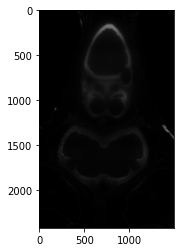

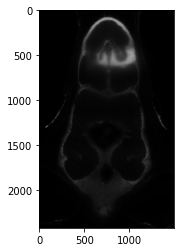

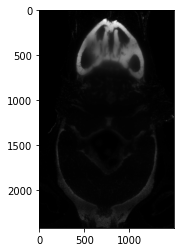

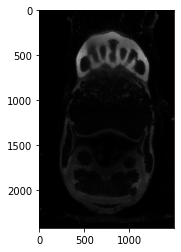

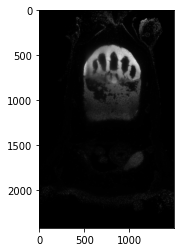

In [5]:
main(os.path.join(rootdir, "stitched_536BP_25um/"),
     os.path.join(tmpdir, "536BP_10um.nii"), 0.25, 10)

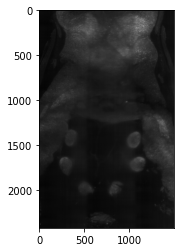

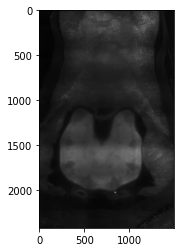

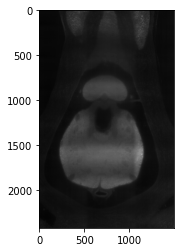

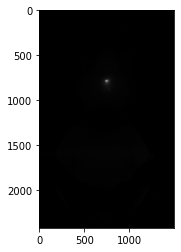

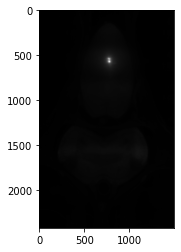

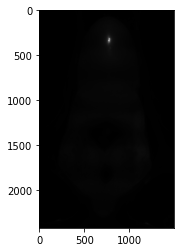

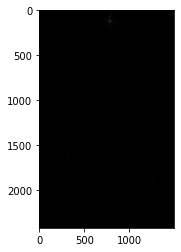

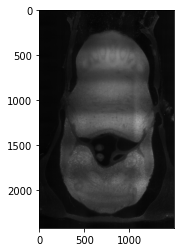

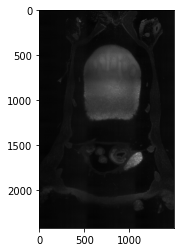

In [6]:
main(os.path.join(rootdir, "stitched_593BP_25um/"),
     os.path.join(tmpdir, "593BP_5um.nii"), 0.5, 5)

In [7]:
subprocess.run(["scp", "-r", os.path.join(tmpdir, "536BP_10um.nii"),
                f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '-r', '/flash/ReiterU/tmp/P189/536BP_10um.nii', 'deigo:/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/analysis'], returncode=0)

In [8]:
subprocess.run(["scp", os.path.join(tmpdir, "593BP_5um.nii"),
                f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '/flash/ReiterU/tmp/P189/593BP_5um.nii', 'deigo:/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/analysis'], returncode=0)